In [33]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

In [34]:
#loading the data set
data = pd.read_csv('IRIS.csv')

In [3]:
#seperating the labels and features
X = data.drop('species', axis=1)
y = data['species']

In [4]:
#encoding the target labels
Label_encoder = LabelEncoder()
y = Label_encoder.fit_transform(y)

In [7]:
#split data for testing & training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
#make predictions on the test set
y_pred = model.predict(X_test)
#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [8]:
#confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(confusion_mat)

confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


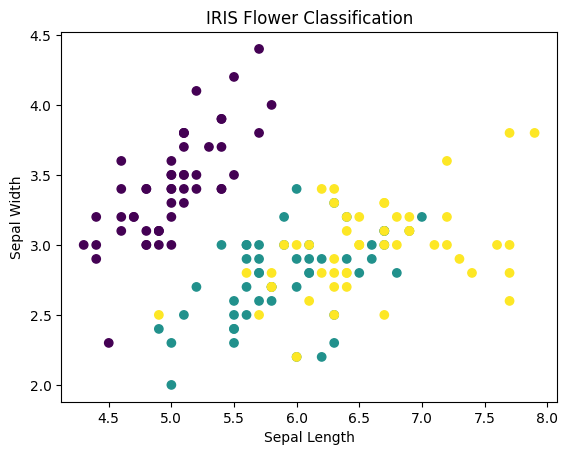

In [10]:
#visualize
plt.scatter(X['sepal_length'], X['sepal_width'], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IRIS Flower Classification')
plt.show()

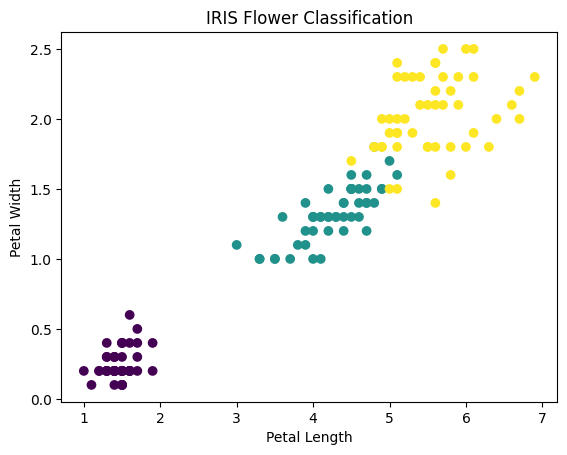

In [12]:
#visualize
plt.scatter(X['petal_length'], X['petal_width'], c=y, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('IRIS Flower Classification')
plt.show()

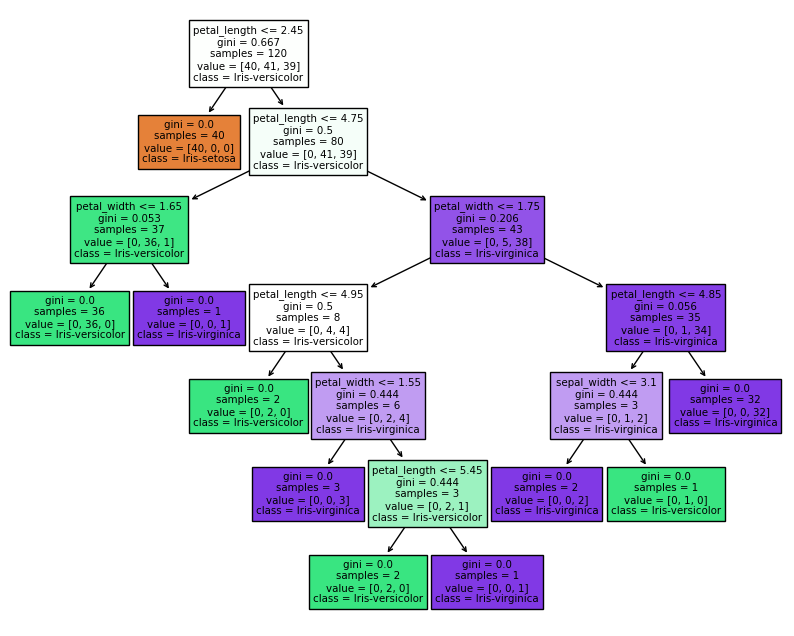

In [32]:
# Separate the features and labels
X = data.drop('species', axis=1)
y = data['species']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert NumPy array to a list
class_names = label_encoder.classes_.tolist()

# Visualize the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=X.columns.tolist(), class_names=class_names, filled=True)
plt.show()


In [36]:
# Create the 3D scatter plot
fig = px.scatter_3d(data, x='sepal_length', y='sepal_width', z='petal_length',
                    color='species', symbol='species', size='petal_width')

# Update the layout
fig.update_layout(scene=dict(
    xaxis_title='Sepal Length (cm)',
    yaxis_title='Sepal Width (cm)',
    zaxis_title='Petal Length (cm)'
))
fig.show()

<Figure size 1000x800 with 0 Axes>

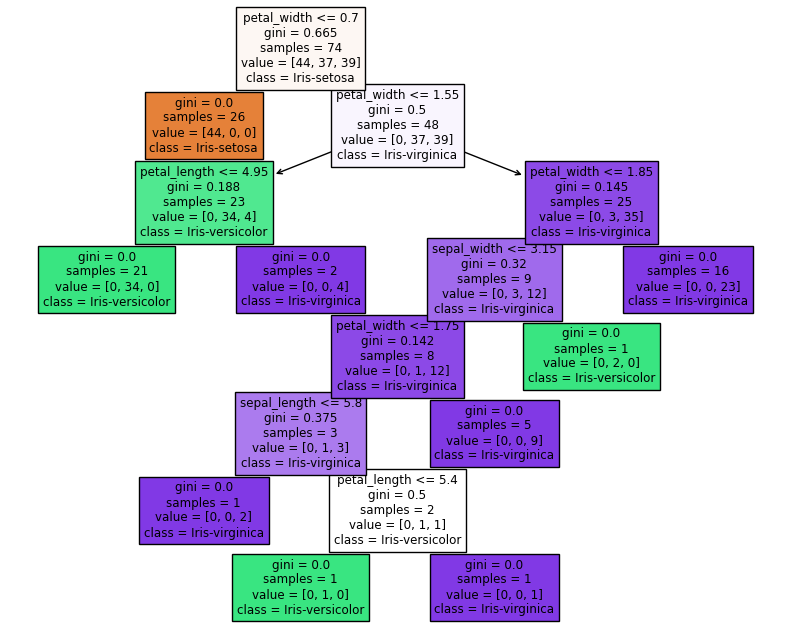

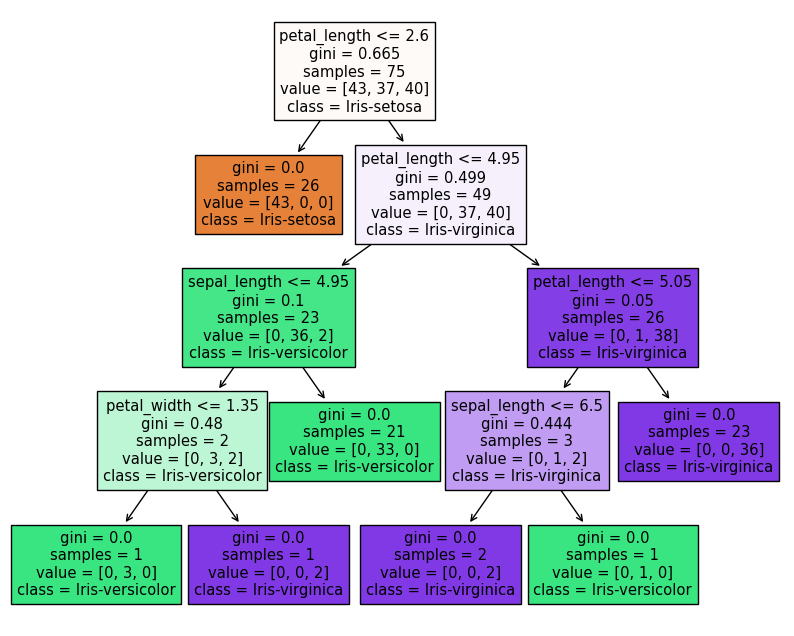

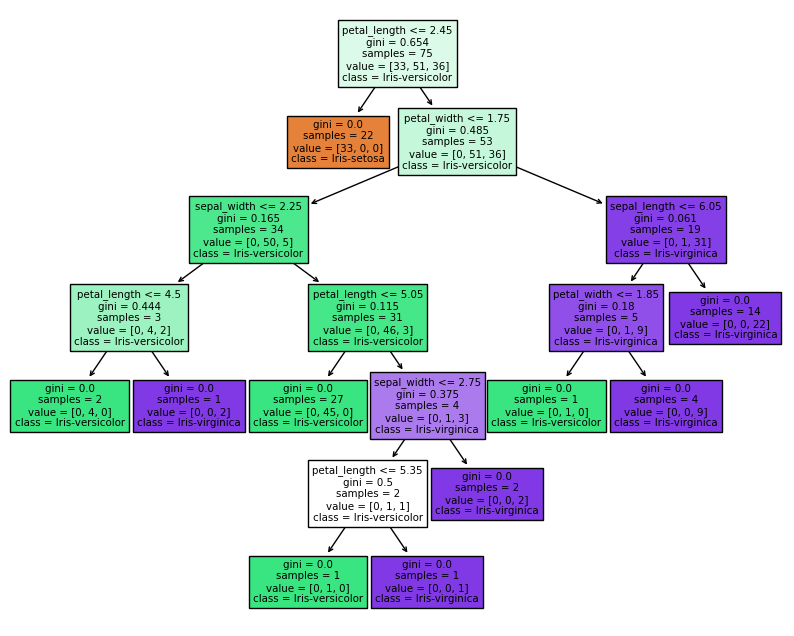

In [41]:
# Separate the features and labels
X = data.drop('species', axis=1)
y = data['species']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert NumPy array to a list
class_names = label_encoder.classes_.tolist()

# Visualize the first three decision trees in the Random Forest
plt.figure(figsize=(10, 8))
for estimator_idx in range(3):  # Visualize the first three trees
    plt.figure(figsize=(10, 8))
    plot_tree(model.estimators_[estimator_idx], feature_names=X.columns.tolist(), class_names=class_names, filled=True)
    plt.show()


In [48]:
# Create scatter plot matrix
fig = px.scatter_matrix(data, dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"],
                        color="species", symbol="species", title="Scatter Plot Matrix - Iris Dataset")

# Update the layout
fig.update_traces(diagonal_visible=False)
fig.show()